In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix

In [24]:
df = pd.read_csv("./stations_cleaned_sample.csv")
originalColumns = df.columns.tolist()
df.shape

(1611, 21)

In [25]:
df.sample(10)

station_code                                monitoring_location  \
1120          2411  RIVER DAYA AT BHUBANESWAR FD/S ( 2 KM AFTER CO...   
943           2104                               RIVER MALEI AT JAORA   
164           3857              RIVER SWAN D/S INDUSTRIAL AREA GAGRET   
785           3372                          RIVER RILANG AT MAWKYRWAT   
1421          2196  RIVER PAWANA AT SANGAVIGAON, VILLAGE- SANGAVIG...   
445          30086  RIVER CHAMBAL AT GWALIOR ROAD BRIDGE, UDI, ETA...   
1121          3894                              RIVER DAYA AT GELAPUR   
401          10103                    RIVER HINDON AT MOHAN NAGAR D/S   
926           1929                             RIVER CHATHE NEAR ICAR   
1347          2682  RIVER NIRA AT U/S OF JUBILANT ORGANOSIS, VILLA...   

               state_name  temp_min  temp_max  do_min  do_max  ph_min  ph_max  \
1120               ODISHA      20.0      33.0     3.0     7.3     6.9     7.7   
943        MADHYA PRADESH      22.0      28.0     7.1     7.5     6.9     8.2   
164      HIMACHAL PRADESH      19.0      32.3     6.4     7.6     7.5     8.2   
785             MEGHALAYA      14.0      19.0     7.3     8.8     6.8     7.2   
1421          MAHARASHTRA      26.0      28.0     3.1     4.4     7.0     7.9   
445         UTTAR PRADESH      18.0      31.0     7.4     9.3     7.1     8.0   
1121               ODISHA      23.0      32.0     6.2     9.4     7.1     8.4   
401         UTTAR PRADESH      18.0      28.0     2.1     6.5     6.8     7.6   
926   MEDZIPHEMA NAGALAND      17.2      31.4     6.6     8.0     6.5     8.9   
1347          MAHARASHTRA      26.0      30.0     5.3     6.2     7.9     8.5   

      conductivity_min  ...  bod_min  bod_max  nitrate_min  nitrate_max  \
1120             155.0  ...      2.3      4.8         0.38         4.79   
943              260.0  ...      1.8      2.1         0.32         2.96   
164              362.0  ...      1.0      2.6         0.32         6.93   
785               30.0  ...      1.0      1.1         0.32         0.41   
1421             223.0  ...     12.0     27.0         0.30         4.98   
445              343.0  ...      1.7      6.5         0.32         0.70   
1121             137.0  ...      1.2      1.7         0.32         0.59   
401              330.0  ...     10.0     20.0         0.35         0.48   
926               85.0  ...      1.2      1.8         0.40         1.80   
1347             483.0  ...      3.0      6.2         0.30         3.38   

      fecal_coliform_min  fecal_coliform_max  total_coliform_min  \
1120              1700.0             54000.0              3500.0   
943                  2.0                 2.0                41.0   
164                  2.0                 6.0                13.0   
785                  2.0                 2.0                24.0   
1421                12.0               275.0               350.0   
445                  2.0             33000.0                 2.0   
1121               230.0              2200.0              1100.0   
401             110000.0            340000.0            140000.0   
926                  NaN                 NaN                 NaN   
1347                 7.0                65.0               120.0   

      total_coliform_max  fecal_streptococci_min  fecal_streptococci_max  
1120             92000.0                    17.0                   240.0  
943                 49.0                     2.0                     2.0  
164                140.0                     2.0                     2.0  
785                 64.0                     2.0                     2.0  
1421              1600.0                     6.0                    30.0  
445              49000.0                     2.0                     2.0  
1121              4900.0                     5.0                    79.0  
401             470000.0                     NaN                     NaN  
926                  NaN                     NaN            

In [26]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

In [27]:
df.columns

Index(['station_code', 'monitoring_location', 'state_name', 'temp_min',
       'temp_max', 'do_min', 'do_max', 'ph_min', 'ph_max', 'conductivity_min',
       'conductivity_max', 'bod_min', 'bod_max', 'nitrate_min', 'nitrate_max',
       'fecal_coliform_min', 'fecal_coliform_max', 'total_coliform_min',
       'total_coliform_max', 'fecal_streptococci_min',
       'fecal_streptococci_max'],
      dtype='object')

In [28]:
turb_cols = [c for c in df.columns if "turbid" in c or c.endswith("ntu") or c == "turbidity"]
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.isna().sum()

station_code                0
monitoring_location         6
state_name                124
temp_min                    7
temp_max                    8
do_min                      8
do_max                      8
ph_min                      8
ph_max                      8
conductivity_min            8
conductivity_max            8
bod_min                     8
bod_max                     8
nitrate_min                56
nitrate_max                56
fecal_coliform_min        184
fecal_coliform_max        185
total_coliform_min        224
total_coliform_max        224
fecal_streptococci_min    766
fecal_streptococci_max    767
dtype: int64

In [31]:
summary = {
    "rows": len(df),
    "cols": len(df.columns),
    "original_columns": originalColumns,
    "normalized_columns": df.columns.tolist(),
    "candidate_turbidity_columns": turb_cols,
    "numeric_columns_count": len(numeric_cols)
}

In [32]:
schema_report = pd.DataFrame({
    "column": df.columns,
    "dtype": [str(df[c].dtype) for c in df.columns],
    "non_null": [df[c].notna().sum() for c in df.columns],
    "nulls": [df[c].isna().sum() for c in df.columns],
    "unique": [df[c].nunique(dropna=True) for c in df.columns]
})
schema_report

column    dtype  non_null  nulls  unique
0             station_code    int64      1605      0    1604
1      monitoring_location   object      1599      6    1598
2               state_name   object      1481    124     116
3                 temp_min  float64      1598      7     149
4                 temp_max  float64      1597      8     164
5                   do_min  float64      1597      8     101
6                   do_max  float64      1597      8     115
7                   ph_min  float64      1597      8      77
8                   ph_max  float64      1597      8      78
9         conductivity_min  float64      1597      8     569
10        conductivity_max  float64      1597      8     940
11                 bod_min  float64      1597      8     108
12                 bod_max  float64      1597      8     172
13             nitrate_min  float64      1549     56     216
14             nitrate_max  float64      1549     56     547
15      fecal_coliform_min  float64      1421    184     186
16      fecal_coliform_max  float64      1420    185     251
17      total_coliform_min  float64      1381    224     206
18      total_coliform_max  float64      1381    224     254
19  fecal_streptococci_min  float64       839    766      75
20  fecal_streptococci_max  float64       838    767     108

In [33]:
df[pd.isna(df['temp_max'])]

station_code                   monitoring_location state_name  temp_min  \
0             1986                   mg/L mg/L Ml 100 mL        NaN     100.0   
796           4121                                   NaN        NaN       NaN   
798           3736                                   NaN        NaN       NaN   
805           4118                                   NaN        NaN       NaN   
806           3717                                   NaN        NaN       NaN   
807           2052                                   NaN        NaN       NaN   
856           1631                                   NaN        NaN       NaN   
1592          4743  RIVER SUBARNAREKHA U/S HCL GHATSHILA        E.S       NaN   

      temp_max  do_min  do_max  ph_min  ph_max  conductivity_min  ...  \
0          NaN     NaN     NaN     NaN     NaN               NaN  ...   
796        NaN     NaN     NaN     NaN     NaN               NaN  ...   
798        NaN     NaN     NaN     NaN     NaN               NaN  ...   
805        NaN     NaN     NaN     NaN     NaN               NaN  ...   
806        NaN     NaN     NaN     NaN     NaN               NaN  ...   
807        NaN     NaN     NaN     NaN     NaN               NaN  ...   
856        NaN     NaN     NaN     NaN     NaN               NaN  ...   
1592       NaN     NaN     NaN     NaN     NaN               NaN  ...   

      bod_min  bod_max  nitrate_min  nitrate_max  fecal_coliform_min  \
0         NaN      NaN          NaN          NaN                 NaN   
796       NaN      NaN          NaN          NaN                 NaN   
798       NaN      NaN          NaN          NaN                 NaN   
805       NaN      NaN          NaN          NaN                 NaN   
806       NaN      NaN          NaN          NaN                 NaN   
807       NaN      NaN          NaN          NaN                 NaN   
856       NaN      NaN          NaN          NaN                 NaN   
1592      NaN      NaN          NaN          NaN                 NaN   

      fecal_coliform_max  total_coliform_min  total_coliform_max  \
0                    NaN                 NaN                 NaN   
796                  NaN                 NaN                 NaN   
798                  NaN                 NaN                 NaN   
805                  NaN                 NaN                 NaN   
806                  NaN                 NaN                 NaN   
807                  NaN                 NaN                 NaN   
856                  NaN                 NaN                 NaN   
1592                 NaN                 NaN                 NaN   

      fecal_streptococci_min  fecal_streptococci_max  
0                        NaN                     NaN  
796                      NaN                     NaN  
798                      NaN                     NaN  
805                      NaN                     NaN  
806                      NaN                     NaN  
807                      NaN                     NaN  
856                      NaN                     NaN  
1592                     NaN                     NaN  

[8 rows x 21 columns]

In [34]:
df = df[pd.notna(df['temp_max'])]

In [35]:
df.isna().sum()

station_code                0
monitoring_location         0
state_name                117
temp_min                    0
temp_max                    0
do_min                      0
do_max                      0
ph_min                      0
ph_max                      0
conductivity_min            0
conductivity_max            0
bod_min                     0
bod_max                     0
nitrate_min                48
nitrate_max                48
fecal_coliform_min        176
fecal_coliform_max        177
total_coliform_min        216
total_coliform_max        216
fecal_streptococci_min    758
fecal_streptococci_max    759
dtype: int64

In [36]:
missing = df[pd.isna(df['fecal_coliform_min'])]

In [37]:
for c in ['nitrate_min', 'nitrate_max', 'fecal_coliform_min', 'fecal_coliform_max', 'total_coliform_min', 'total_coliform_max']:
    df[c+"missing"] = df[c].isna().astype(int)
    df[c] = df[c].fillna(df[c].median())

In [38]:
df.drop(columns=["fecal_streptococci_min","fecal_streptococci_max"], inplace=True)

In [39]:
df["state_name"] = df["state_name"].fillna("Unknown")

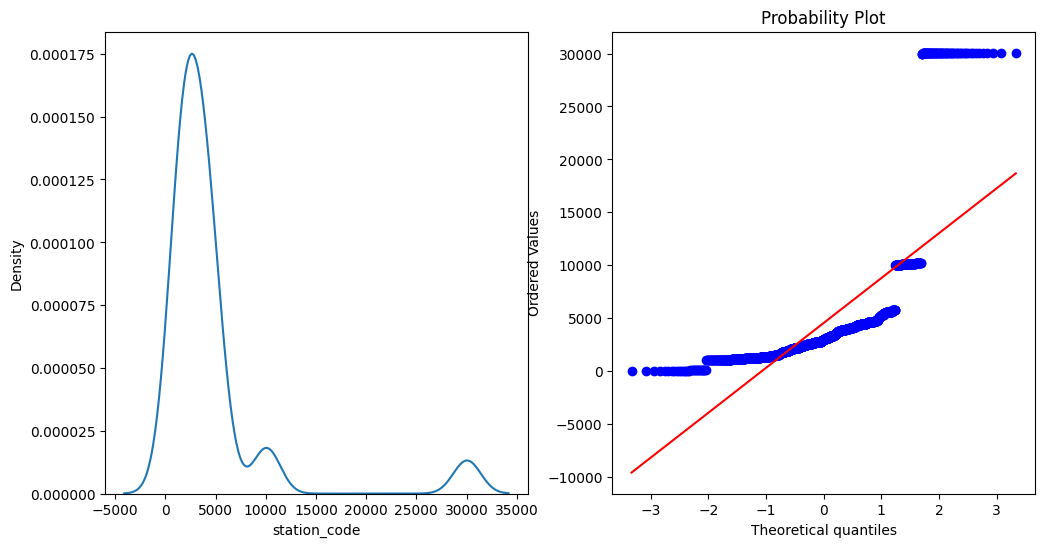

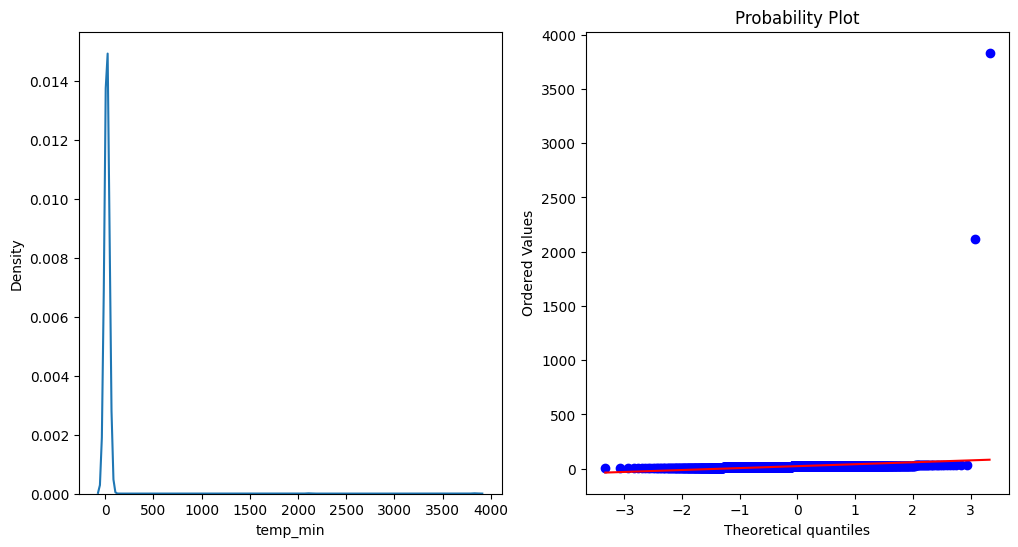

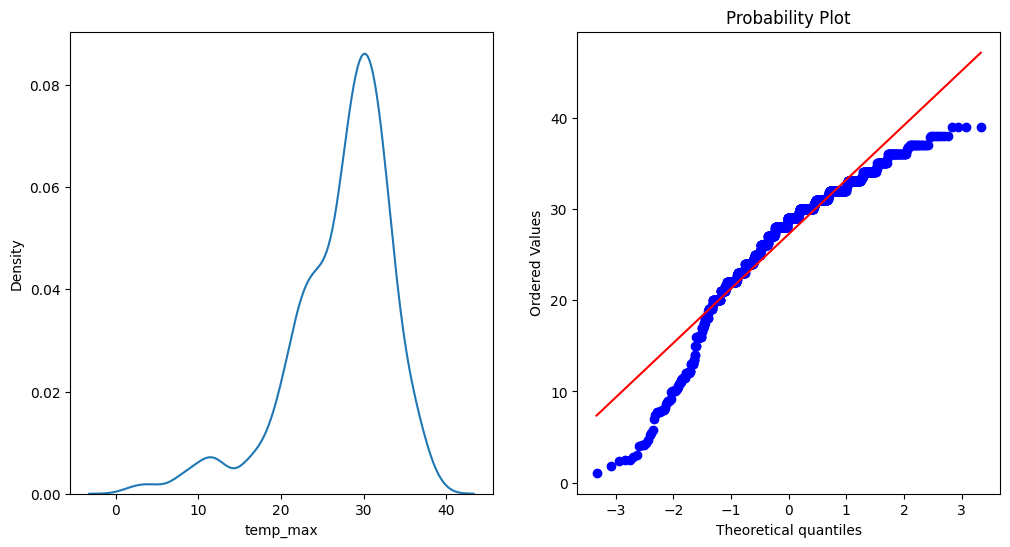

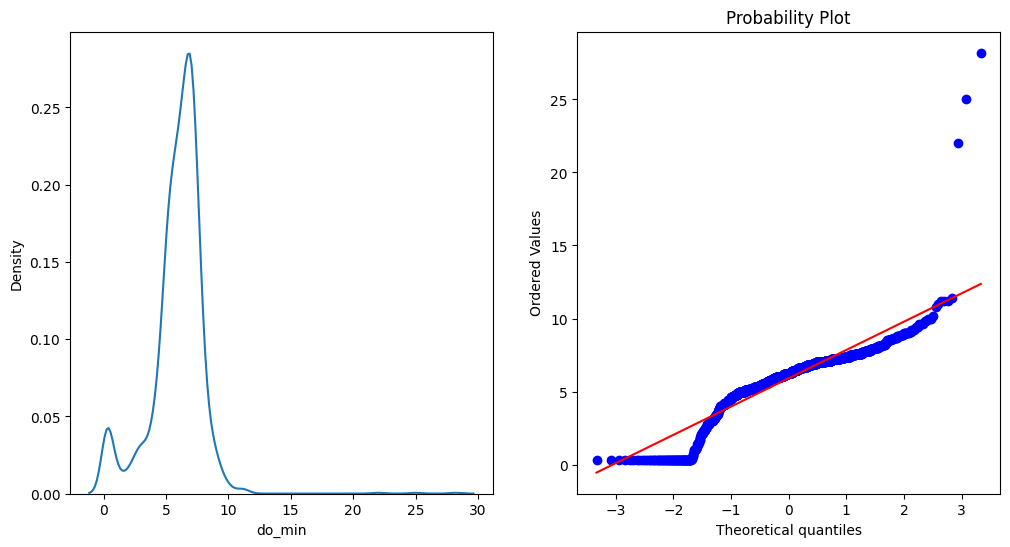

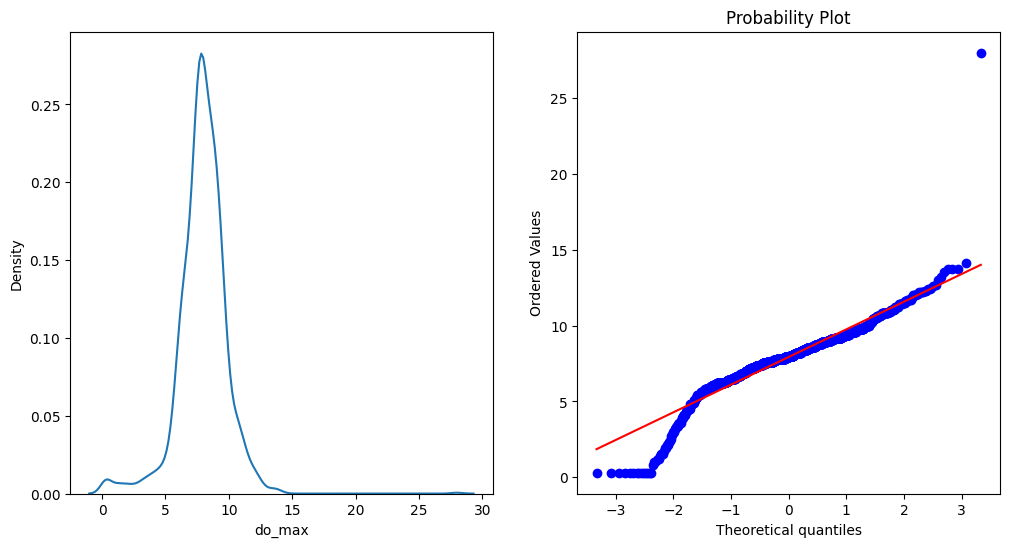

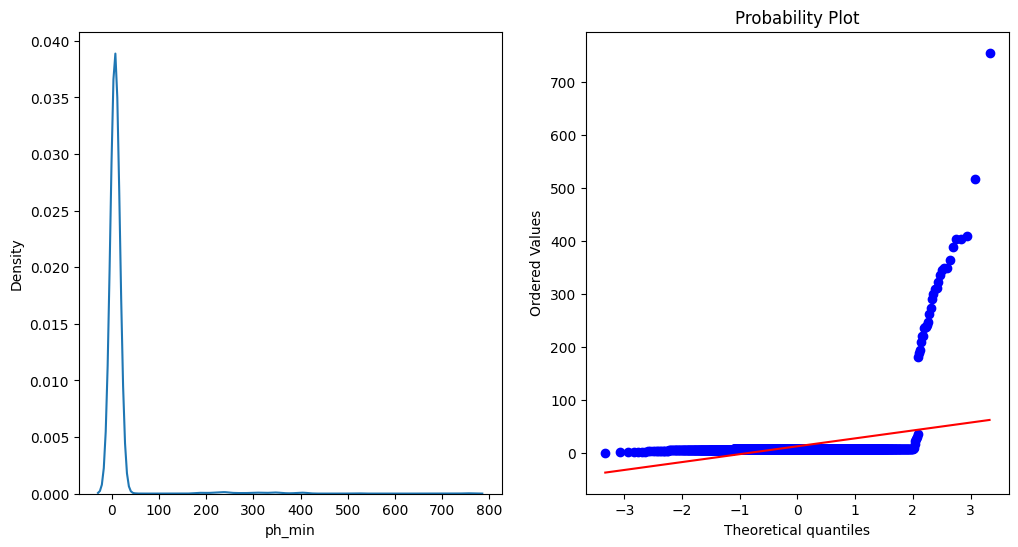

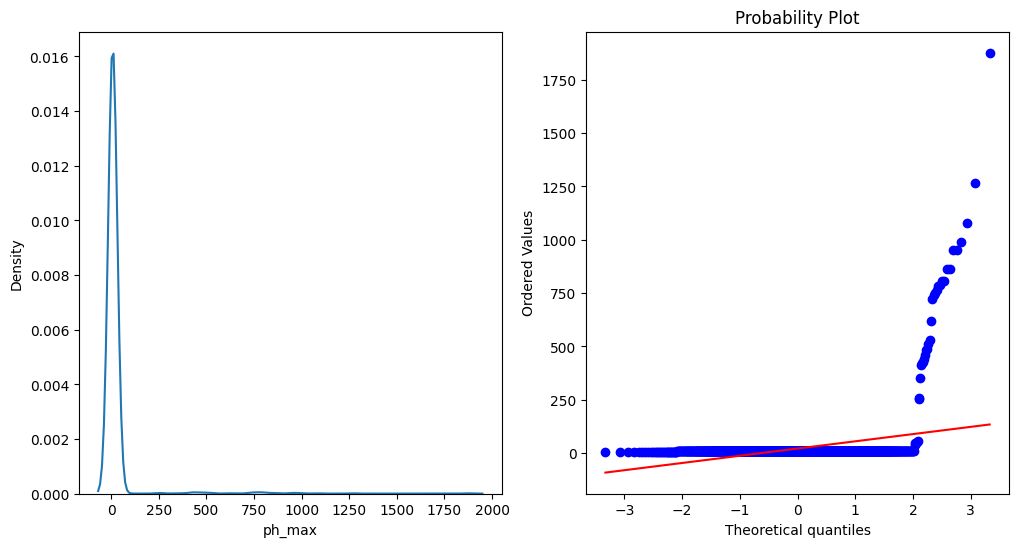

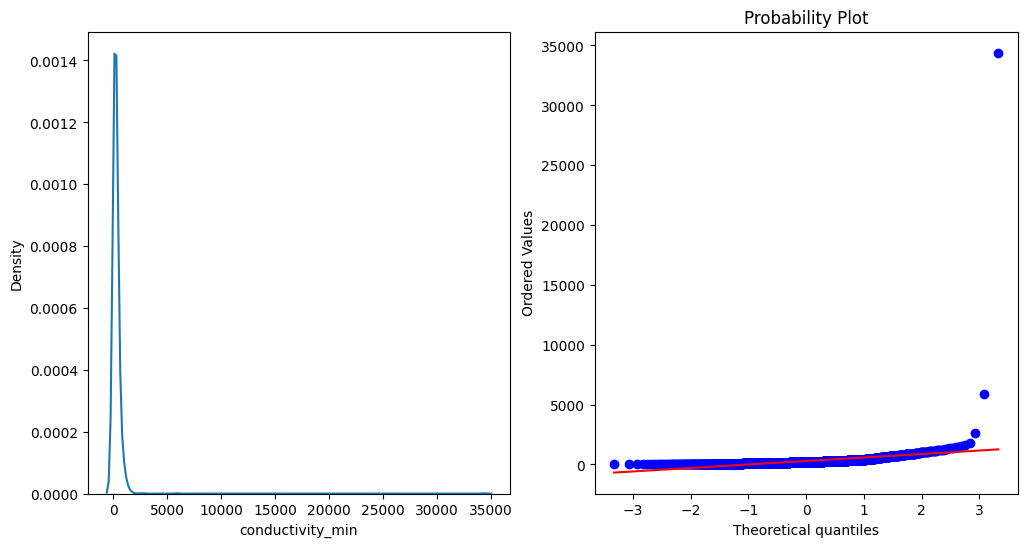

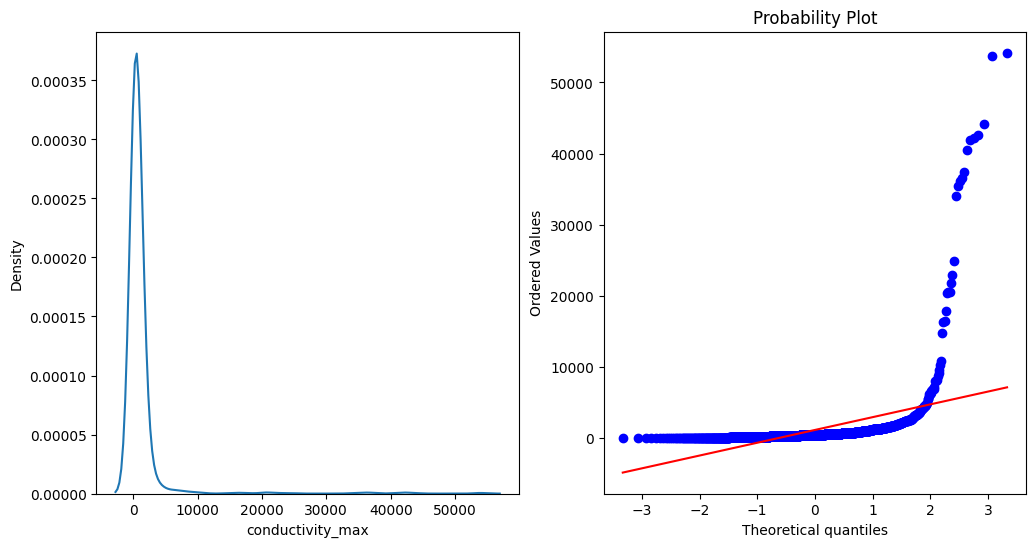

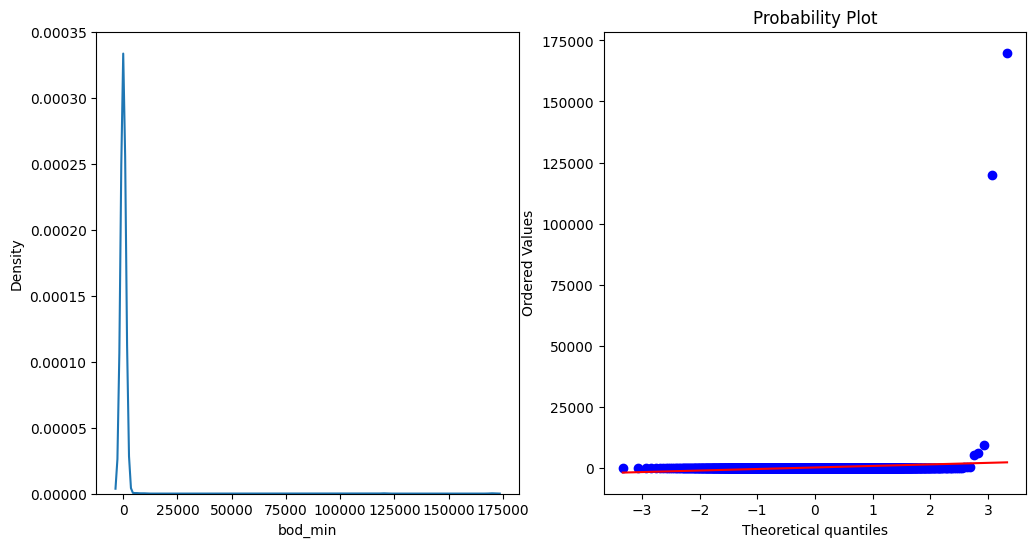

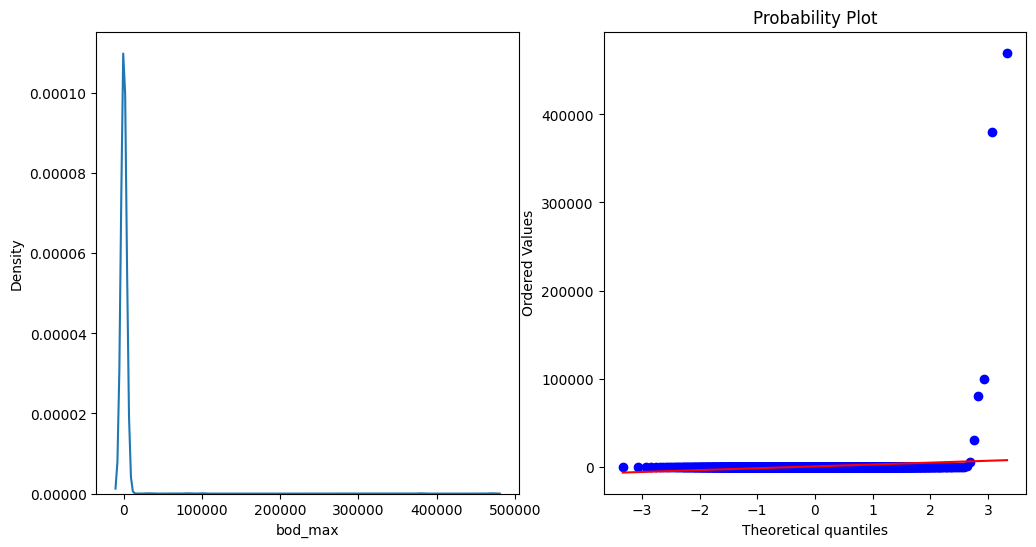

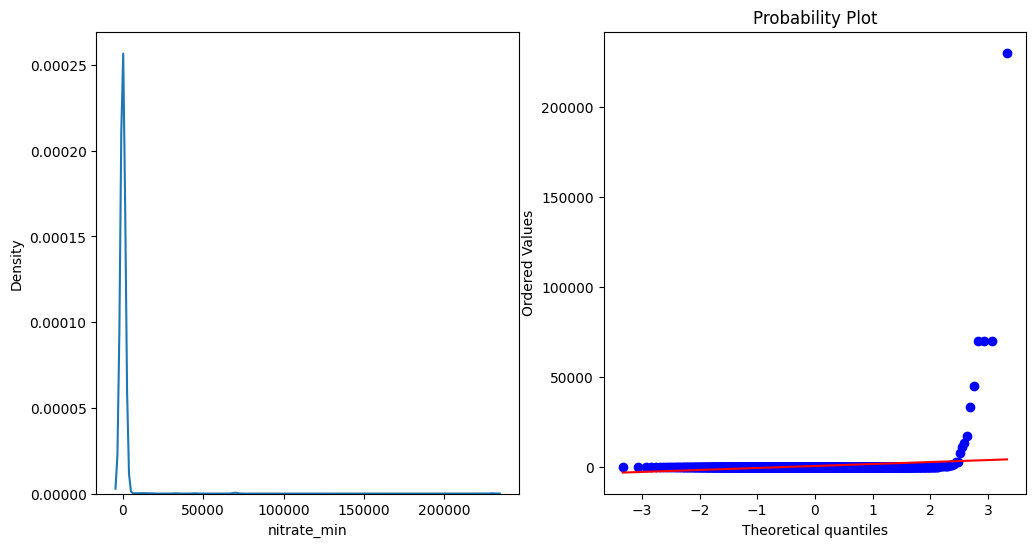

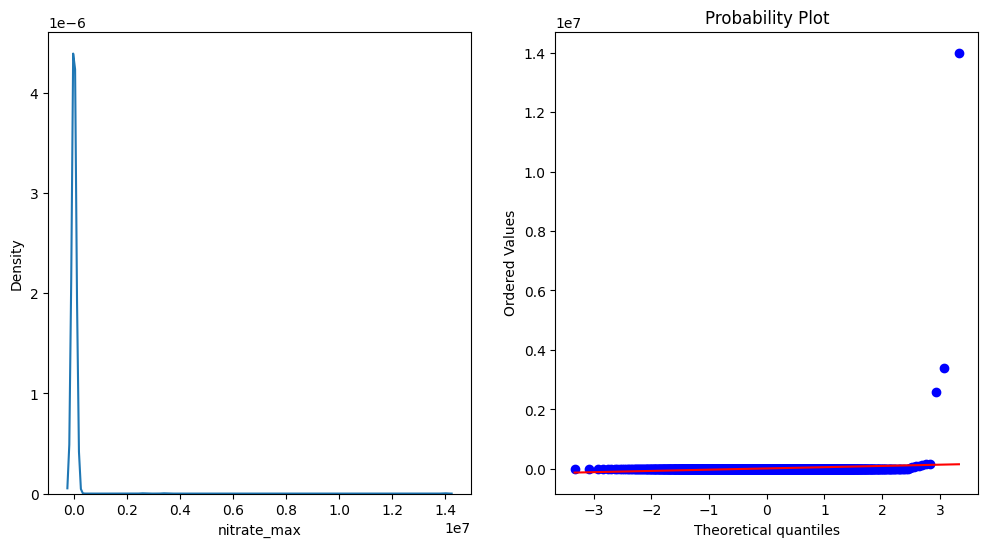

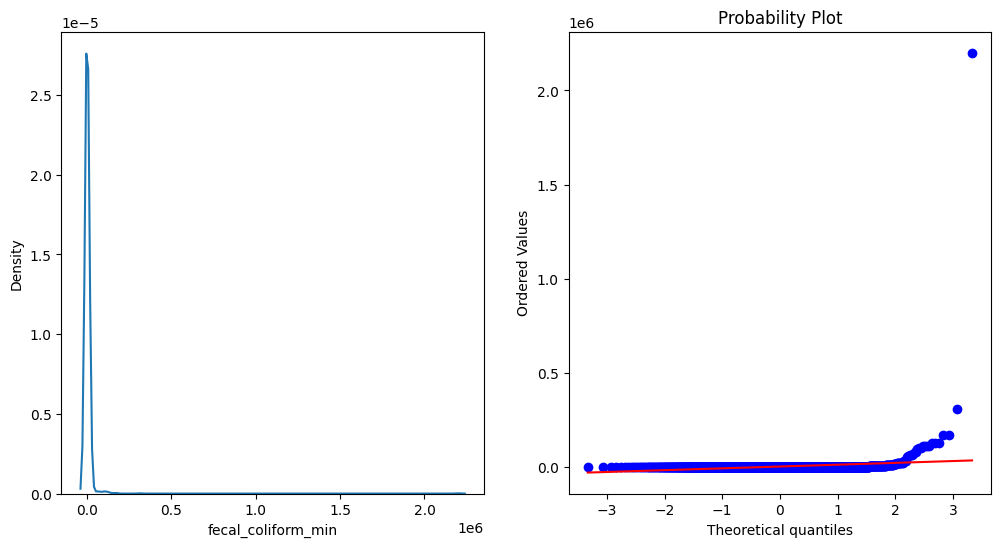

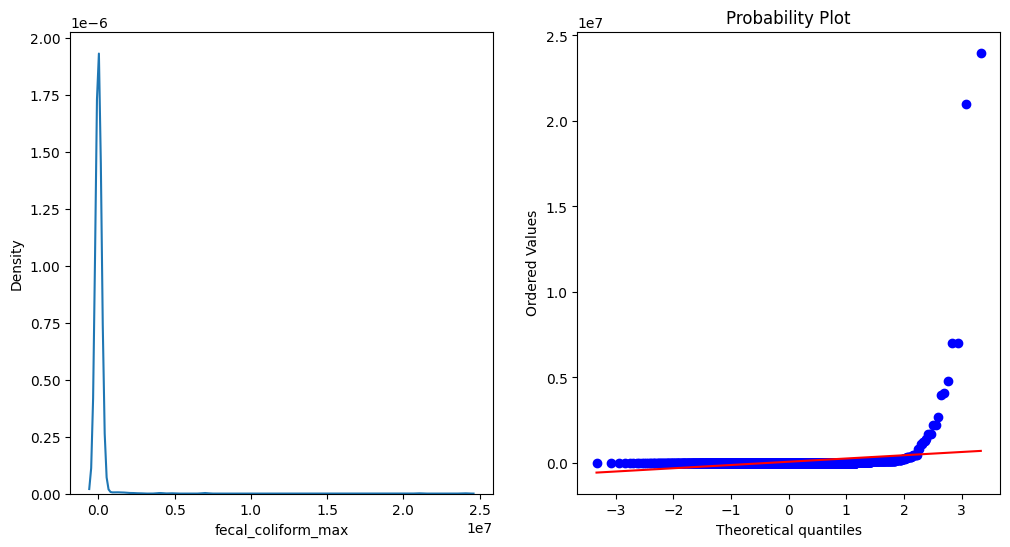

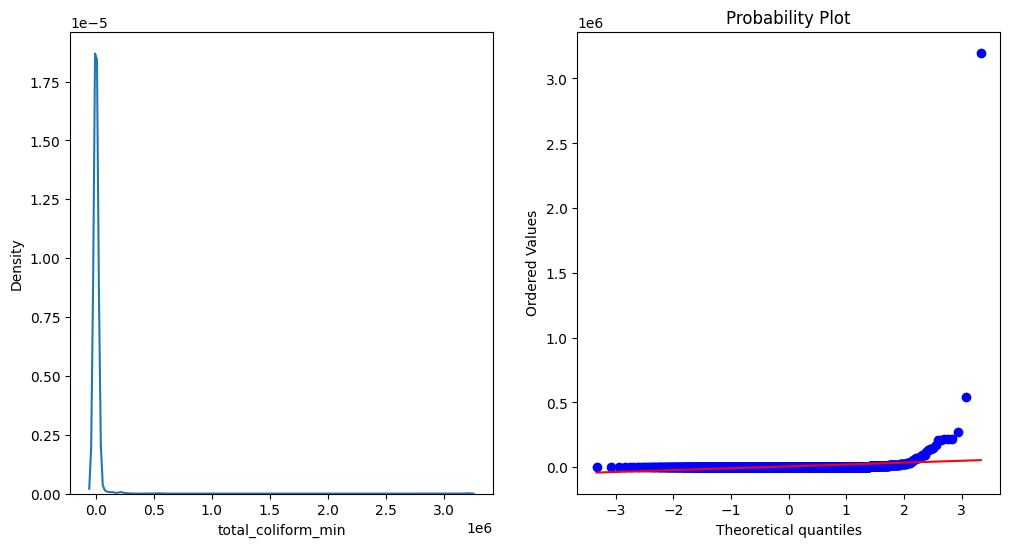

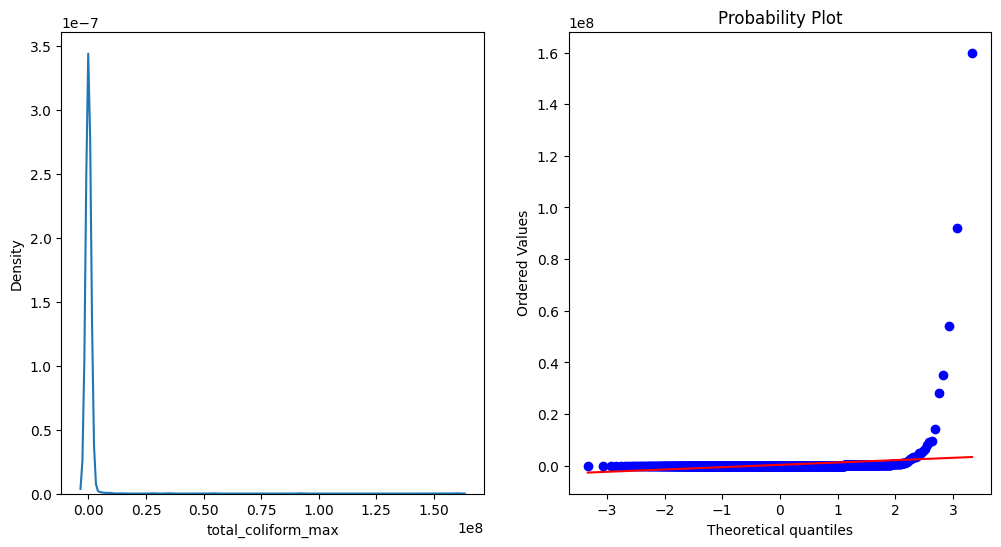

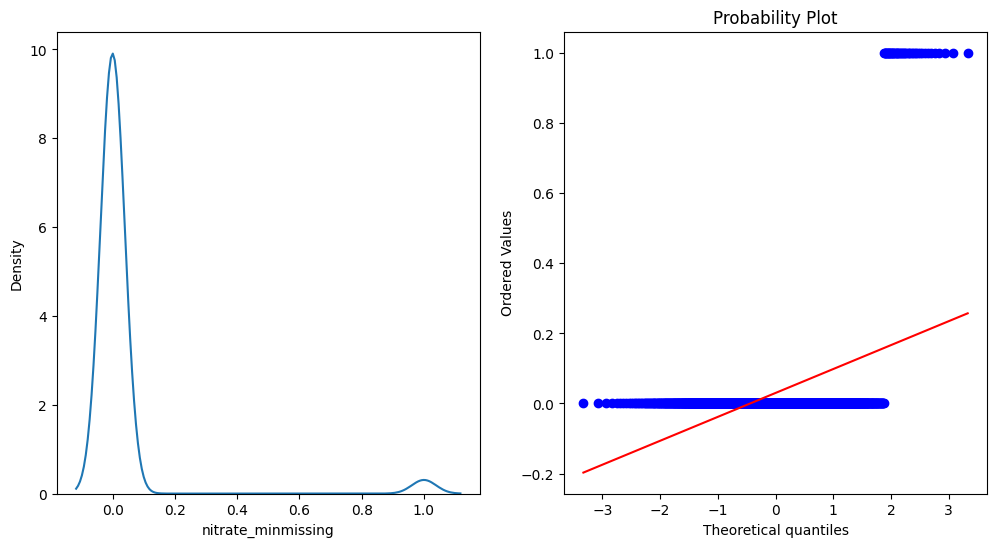

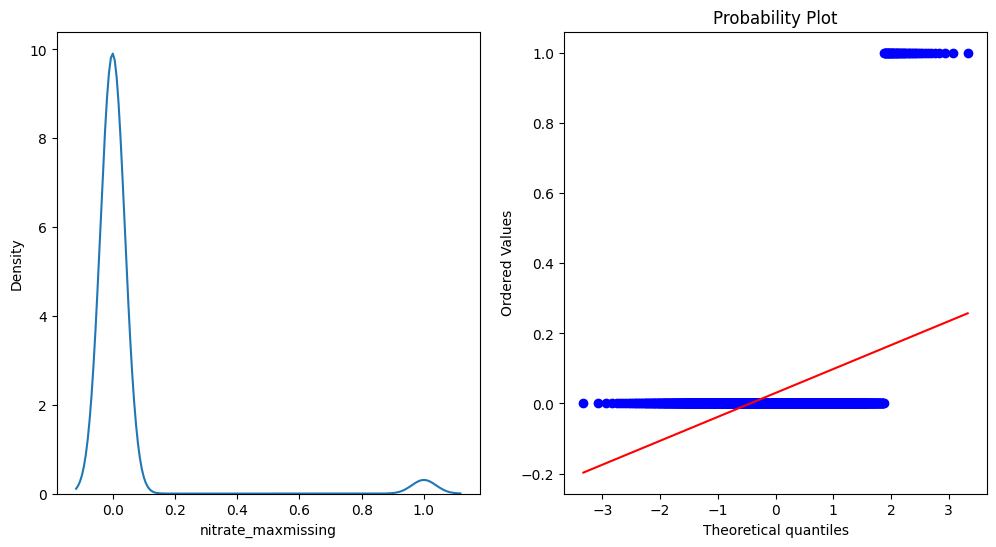

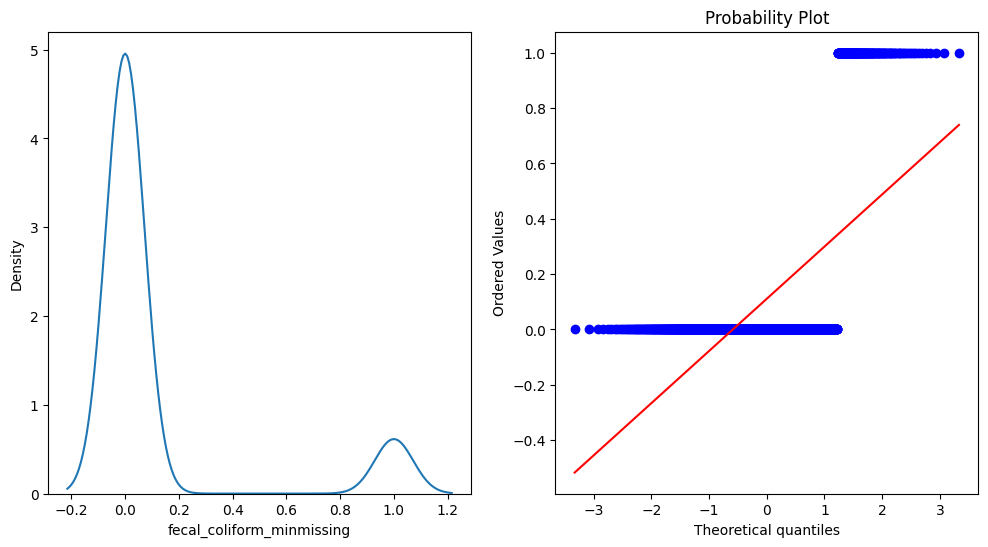

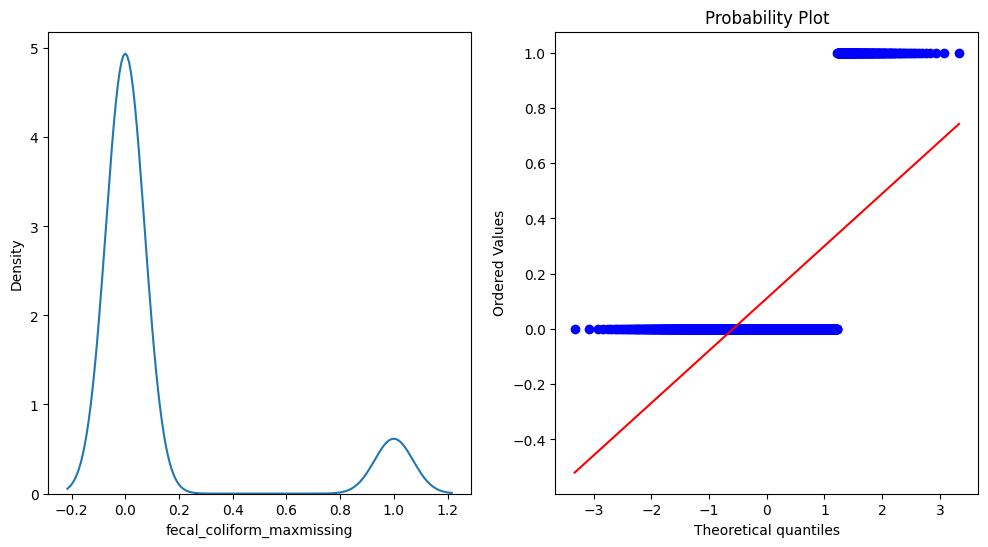

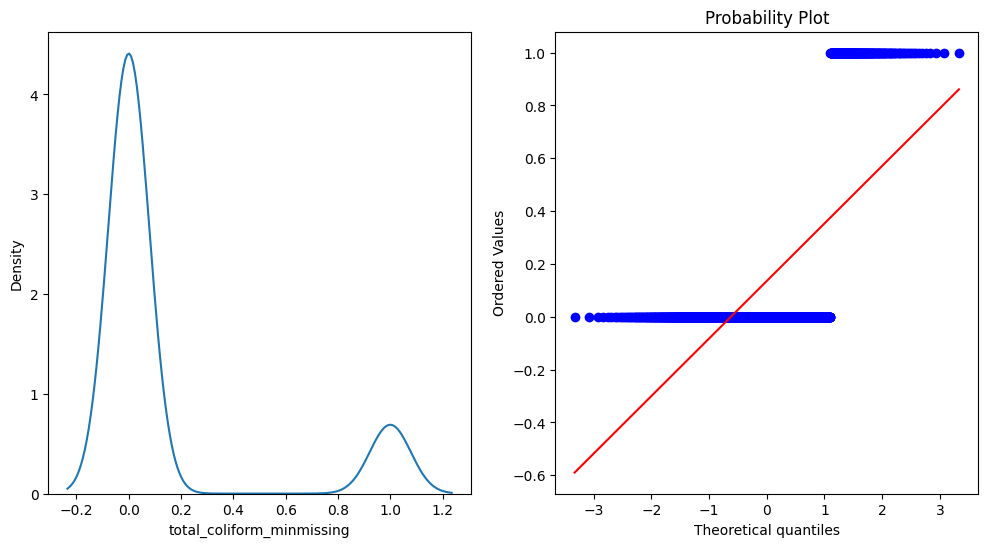

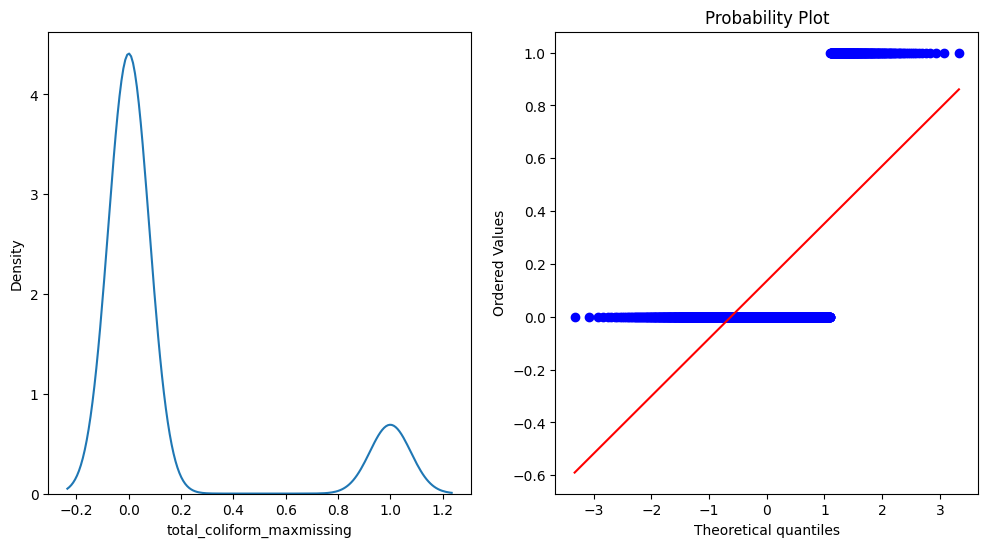

In [40]:
from scipy import stats as stats

for col in df.select_dtypes(np.number).columns:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    sns.kdeplot(df, x=col, ax=ax1)
    stats.probplot(df[col], dist='norm', plot=ax2)
    plt.show()

In [41]:
df[['temp_min', 'do_min', 'do_max', 'ph_min', 'ph_max', 'conductivity_min', 'conductivity_max', 'bod_min', 'bod_max','nitrate_min', 'nitrate_max', 'fecal_coliform_min', 'fecal_coliform_max', 'total_coliform_min', 'total_coliform_max']] = df[['temp_min', 'do_min', 'do_max', 'ph_min', 'ph_max', 'conductivity_min', 'conductivity_max', 'bod_min', 'bod_max','nitrate_min', 'nitrate_max', 'fecal_coliform_min', 'fecal_coliform_max', 'total_coliform_min', 'total_coliform_max']].apply(np.log1p) # type: ignore

In [42]:
df[['temp_min', 'ph_min', 'ph_max', 'bod_min', 'bod_max', 'nitrate_min', 'nitrate_max']] = df[['temp_min', 'ph_min', 'ph_max', 'bod_min', 'bod_max', 'nitrate_min', 'nitrate_max']].apply(np.log1p)

In [43]:
df.to_csv("./stations_cleaned.csv", index=False)